In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(42)

In [44]:
def load_file(path):
    
    values = []
    
    with open(path, "r") as fin:
        for line in fin:
            value = float(line.strip())
            
            assert value <= 1.0
            
            values.append(value)
    return np.array(values[3520019:])

In [56]:
def plot_hist(values, title="Weight frequency", smoothing_exp=None):

    values_copy = np.copy(values)
    
    if smoothing_exp is not None:
        values_copy **= smoothing_exp
    
    plt.hist(values_copy, density=False, bins=200)  # `density=False` would make counts
    plt.ylabel('Count')
    plt.xlabel('Weight')
    plt.title(title)
    plt.show()

In [46]:
values = load_file("raw_paracrawl.100.mined.score.instance_weighting/train.weights")

values[:10], len(values)

(array([ 1.        ,  0.97196296,  0.95285541,  0.94902001,  0.91754631,
         0.9166561 ,  0.91560646,  0.90565363,  0.90083438,  0.89446525]),
 2069323)

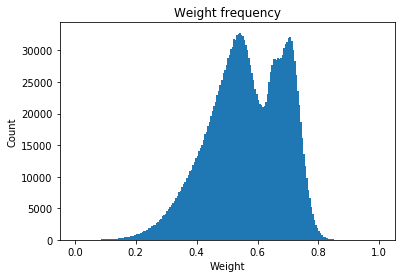

In [47]:
plot_hist(values)

Now for all weight types:

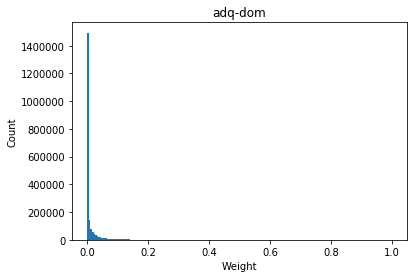

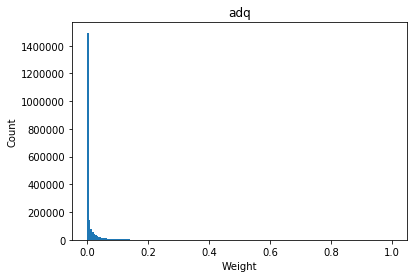

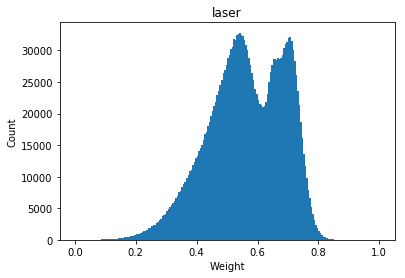

In [57]:
names = ["adq-dom", "adq", "laser"]

paths = ["raw_paracrawl.100.dcce.adq-dom.instance_weighting/train.weights",
         "raw_paracrawl.100.dcce.adq.instance_weighting/train.weights",
         "raw_paracrawl.100.mined.score.instance_weighting/train.weights"]

values_list = [load_file(path) for path in paths]

for name, values in zip(names, values_list):
    plot_hist(values, name)

Now with exponential smoothing:

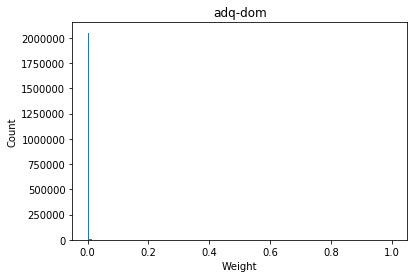

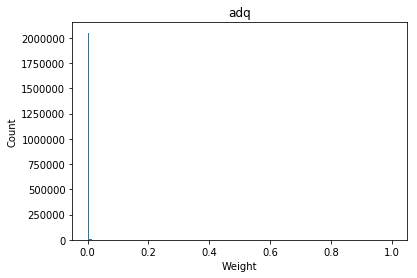

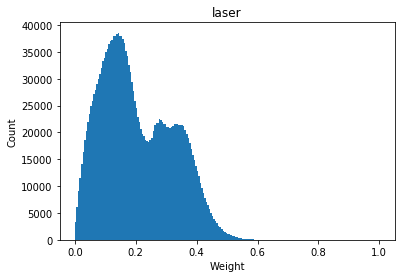

In [65]:
for name, values in zip(names, values_list):
    plot_hist(values, name, smoothing_exp=3.0)

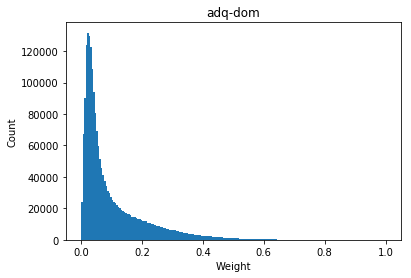

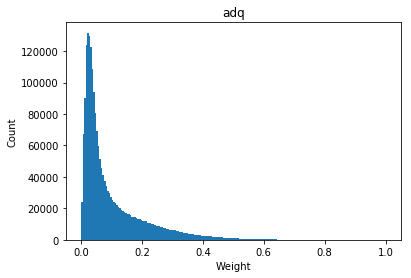

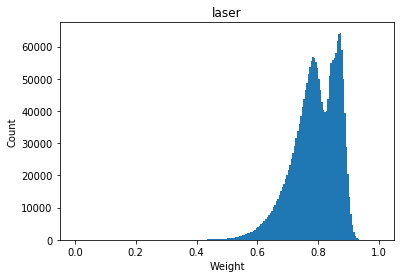

In [66]:
for name, values in zip(names, values_list):
    plot_hist(values, name, smoothing_exp=0.4)